<a href="https://colab.research.google.com/github/LudoSK/Docs-Classificator/blob/master/Projet_SIEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTATION DES DATA**

In [1]:
#import des bibliothèques
from sklearn import preprocessing
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import pandas as pd



In [2]:
data= arff.loadarff('/content/Train.arff')
df_train = pd.DataFrame(data[0])

data= arff.loadarff('/content/Test.arff')
df_test = pd.DataFrame(data[0])

In [3]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


In [4]:
#Afficher les premières lignes pour vérifier le chargement
#print(df_train.head())

**Exploration et nettoyage des données**

Examiner la structure et les types de données

125973 entries, 0 to 125972
Data columns (total 42 columns):

In [5]:
# Obtenir un résumé des types de données et des valeurs manquantes
#print(df_train.info())

# Obtenir des statistiques descriptives pour les colonnes numériques
#print(df_train.describe())


In [6]:
#tranformation de protocol_type

le = preprocessing.LabelEncoder()
le.fit(df_train['protocol_type'])
df_train['protocol_type_n'] = le.transform(df_train['protocol_type'])

#--------------------------------------------------------------------------
#class-=
le = preprocessing.LabelEncoder()
le.fit(df_train['class'])
df_train['class_n'] = le.transform(df_train['class'])

#------------------------------------------------------------------
#service m
le = preprocessing.LabelEncoder()
le.fit(df_train['service'])
df_train['service_n'] = le.transform(df_train['service'])
#------------------------------------------------------------------
#flag m
le = preprocessing.LabelEncoder()
le.fit(df_train['flag'])
df_train['flag_n'] = le.transform(df_train['flag'])
#------------------------------------------------------------------------------
#is_host_login

le = preprocessing.LabelEncoder()
le.fit(df_train['is_host_login'])
df_train['is_host_login_n'] = le.transform(df_train['is_host_login'])
#----------------------------------------------------------------------------
#wrong_fragment

le = preprocessing.LabelEncoder()
le.fit(df_train['wrong_fragment'])
df_train['wrong_fragment_n'] = le.transform(df_train['wrong_fragment'])
#---------------------------------------------------------------------------------------------------------------

#logged_in
le = preprocessing.LabelEncoder()
le.fit(df_train['logged_in'])
df_train['logged_in_n'] = le.transform(df_train['logged_in'])
#----------------------------------------------------------------------------------------------------------------
#is_guest_login
le = preprocessing.LabelEncoder()
le.fit(df_train['is_guest_login'])
df_train['is_guest_login_n'] = le.transform(df_train['is_guest_login'])
#-------------------------------------------------------------------------------------------------------------
#land
le = preprocessing.LabelEncoder()
le.fit(df_train['land'])
df_train['land_n'] = le.transform(df_train['land'])

In [7]:
#create  new  dataframe
df_trains= df_train.drop(['protocol_type','is_guest_login','logged_in','wrong_fragment','is_host_login','flag','service','class','land'],axis=1)
valeurs_prot= df_trains.apply(lambda x: x.unique())
print(valeurs_prot)

duration                       [0.0, 5607.0, 507.0, 1.0, 2.0, 9052.0, 315.0, ...
src_bytes                      [491.0, 146.0, 0.0, 232.0, 199.0, 287.0, 334.0...
dst_bytes                      [0.0, 8153.0, 420.0, 2251.0, 13788.0, 616.0, 1...
urgent                                                      [0.0, 1.0, 3.0, 2.0]
hot                            [0.0, 5.0, 6.0, 4.0, 2.0, 1.0, 28.0, 30.0, 22....
num_failed_logins                                 [0.0, 2.0, 1.0, 3.0, 4.0, 5.0]
num_compromised                [0.0, 3.0, 2.0, 1.0, 19.0, 5.0, 4.0, 38.0, 107...
root_shell                                                            [0.0, 1.0]
su_attempted                                                     [0.0, 1.0, 2.0]
num_root                       [0.0, 9.0, 10.0, 1.0, 5.0, 2.0, 6.0, 54.0, 14....
num_file_creations             [0.0, 1.0, 8.0, 4.0, 2.0, 15.0, 13.0, 29.0, 19...
num_shells                                                       [0.0, 1.0, 2.0]
num_access_files            

In [8]:
df_trains.head()

,duration,src_bytes,dst_bytes,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,...,dst_host_srv_rerror_rate,protocol_type_n,class_n,service_n,flag_n,is_host_login_n,wrong_fragment_n,logged_in_n,is_guest_login_n,land_n
0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,1,1,20,9,0,0,0,0,0
1,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,2,1,44,9,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,1,0,49,5,0,0,0,0,0
3,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,1,1,24,9,0,0,1,0,0
4,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,1,1,24,9,0,0,1,0,0


In [9]:
# Obtenir un résumé des types de données et des valeurs manquantes
print(df_trains.info())

# Obtenir des statistiques descriptives pour les colonnes numériques
#print(df_trains.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   src_bytes                    125973 non-null  float64
 2   dst_bytes                    125973 non-null  float64
 3   urgent                       125973 non-null  float64
 4   hot                          125973 non-null  float64
 5   num_failed_logins            125973 non-null  float64
 6   num_compromised              125973 non-null  float64
 7   root_shell                   125973 non-null  float64
 8   su_attempted                 125973 non-null  float64
 9   num_root                     125973 non-null  float64
 10  num_file_creations           125973 non-null  float64
 11  num_shells                   125973 non-null  float64
 12  num_access_files             125973 non-null  float64
 13 



**Analyse de données spécifique**
**Corrélation entre les variables**


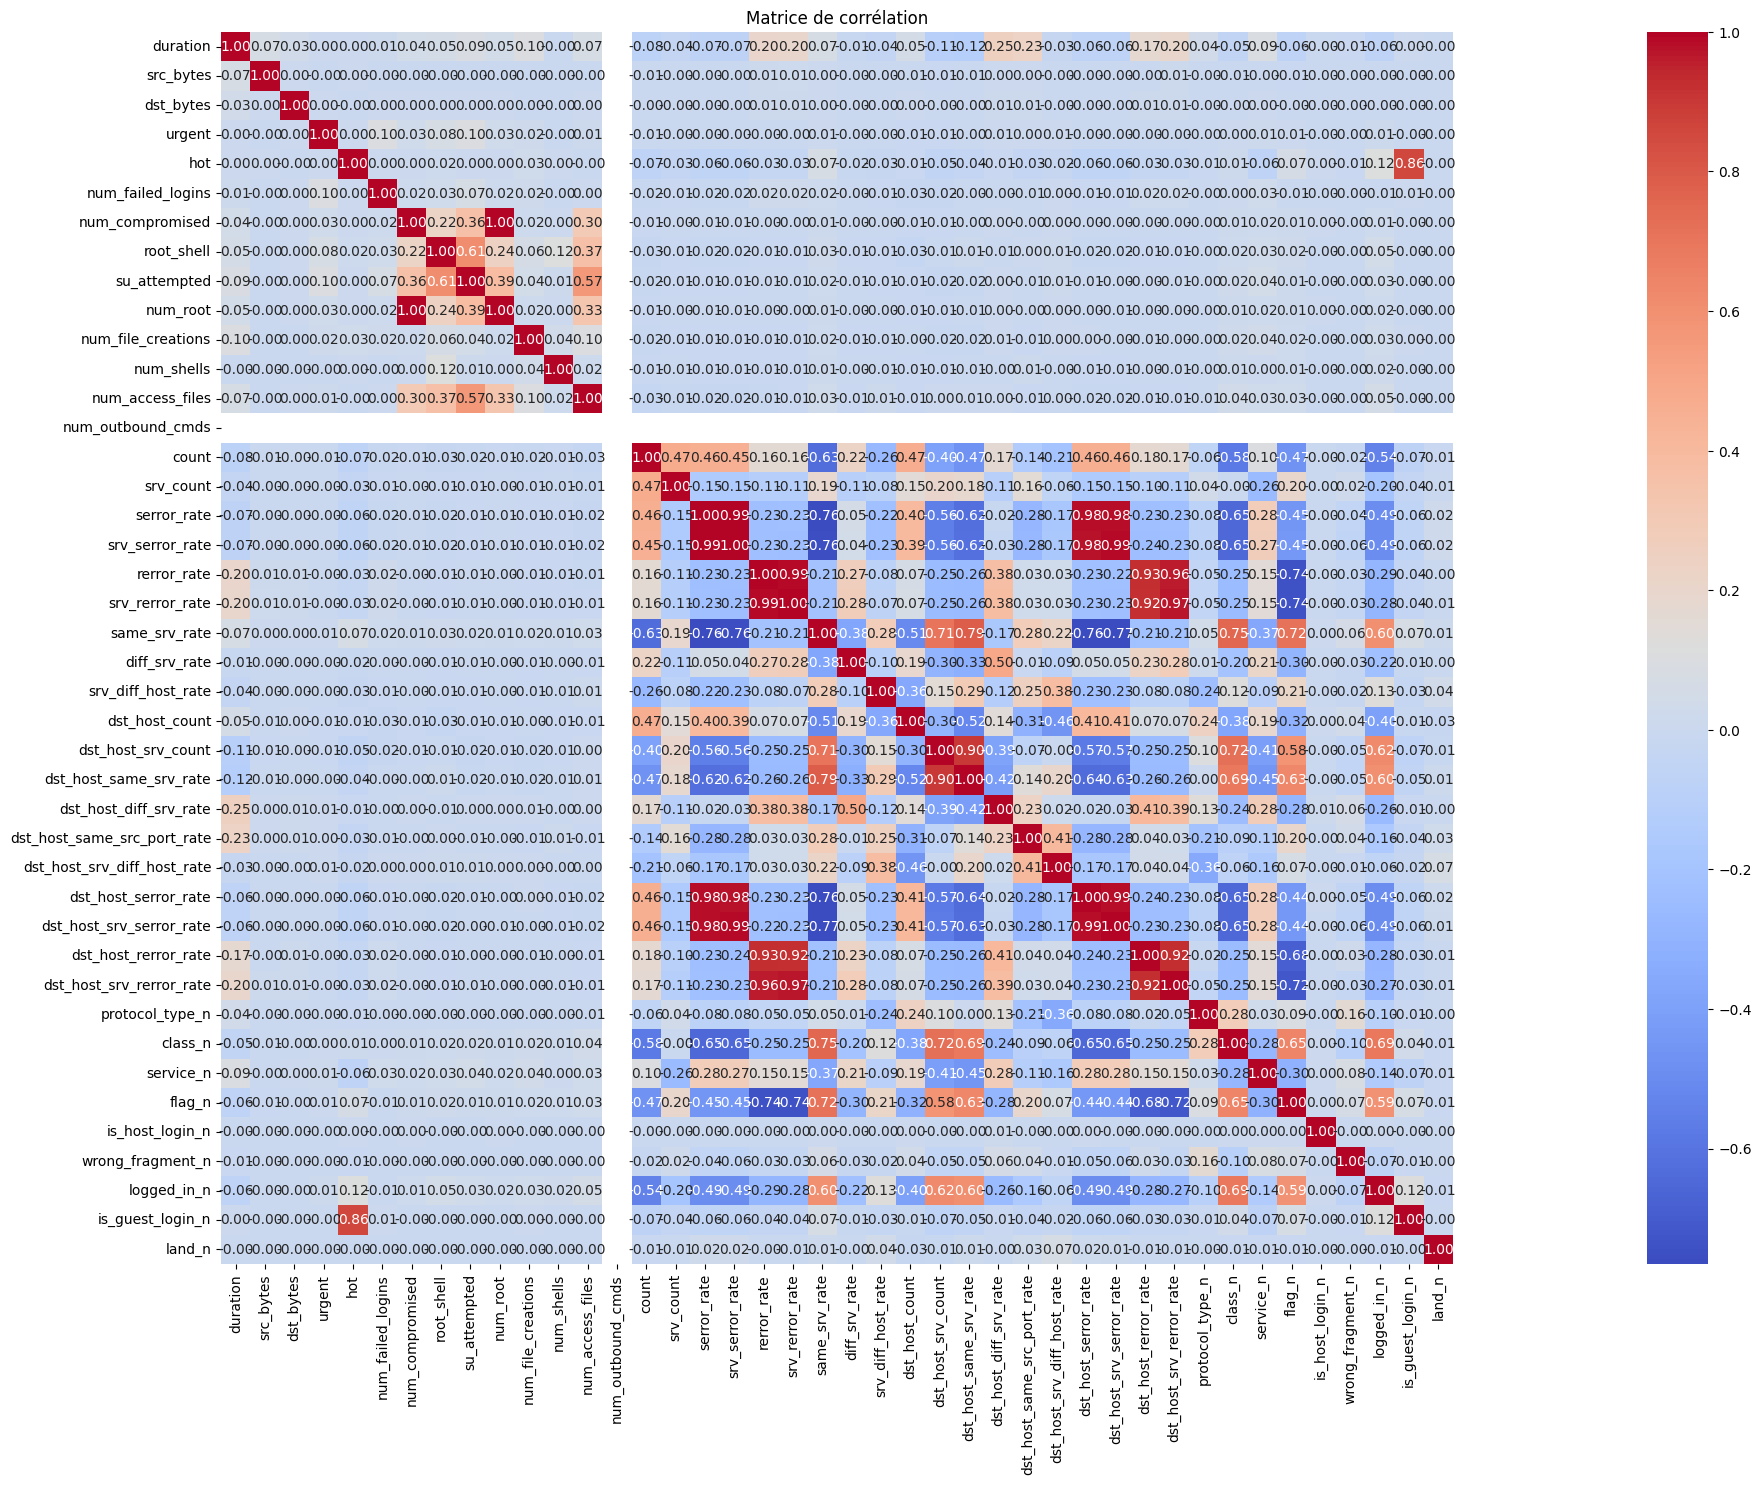

In [10]:
#Calculer la matrice de corrélation


correlation_matrix = df_trains.corr()

plt.figure(figsize=(50,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation")
plt.show()


In [11]:
X_trains = df_trains.drop(['class_n','num_outbound_cmds'], axis= 1)
X_trains
#, 'dst_host_serror_rate','dst_host_rerror_rate', 'is_guest_login_n'

,duration,src_bytes,dst_bytes,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_n,service_n,flag_n,is_host_login_n,wrong_fragment_n,logged_in_n,is_guest_login_n,land_n
0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,0.00,1,20,9,0,0,0,0,0
1,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,2,44,9,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,49,5,0,0,0,0,0
3,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.01,1,24,9,0,0,1,0,0
4,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,24,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,49,5,0,0,0,0,0
125969,8.0,105.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,2,49,9,0,0,0,0,0
125970,0.0,2231.0,384.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00,1,54,9,0,0,1,0,0
125971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,30,5,0,0,0,0,0


In [12]:
y_trains = df_trains.class_n
y_trains

0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: class_n, Length: 125973, dtype: int64

In [13]:
 # utilisation des données du test
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,b'tcp',b'smtp',b'SF',794.0,333.0,b'0',0.0,0.0,0.0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22540,0.0,b'tcp',b'http',b'SF',317.0,938.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,b'normal'
22541,0.0,b'tcp',b'http',b'SF',54540.0,8314.0,b'0',0.0,0.0,2.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,b'anomaly'
22542,0.0,b'udp',b'domain_u',b'SF',42.0,42.0,b'0',0.0,0.0,0.0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,b'normal'


In [14]:
# Define the columns that you need to label encode
columns_to_encode = [
    'protocol_type', 'class', 'service', 'flag', 'is_host_login',
    'wrong_fragment', 'logged_in', 'is_guest_login', 'land'
]

# Initialize a LabelEncoder
le = preprocessing.LabelEncoder()

# Loop through the columns and apply Label Encoding
for column in columns_to_encode:
    le.fit(df_test[column])
    df_test[f'{column}_n'] = le.transform(df_test[column])


In [15]:
df_tests= df_test.drop(['protocol_type','is_guest_login','logged_in','wrong_fragment','is_host_login','flag','service','class','land'],axis=1)
valeurs_prot= df_tests.apply(lambda x: x.unique())
print(valeurs_prot)

duration                       [0.0, 2.0, 1.0, 37.0, 805.0, 8.0, 282.0, 7428....
src_bytes                      [0.0, 12983.0, 20.0, 267.0, 1022.0, 129.0, 327...
dst_bytes                      [0.0, 15.0, 14515.0, 387.0, 174.0, 467.0, 157....
urgent                                                      [0.0, 1.0, 2.0, 3.0]
hot                            [0.0, 4.0, 2.0, 1.0, 7.0, 6.0, 5.0, 3.0, 22.0,...
num_failed_logins                                      [0.0, 1.0, 3.0, 2.0, 4.0]
num_compromised                [0.0, 1.0, 611.0, 2.0, 8.0, 14.0, 165.0, 11.0,...
root_shell                                                            [0.0, 1.0]
su_attempted                                                     [0.0, 2.0, 1.0]
num_root                       [0.0, 1.0, 684.0, 4.0, 23.0, 173.0, 17.0, 7.0,...
num_file_creations               [0.0, 4.0, 2.0, 1.0, 3.0, 100.0, 5.0, 6.0, 7.0]
num_shells                                                  [0.0, 1.0, 2.0, 5.0]
num_access_files            

In [16]:
X_tests = df_tests.drop(['class_n','num_outbound_cmds'], axis= 1)
X_tests
#, 'dst_host_serror_rate', 'dst_host_rerror_rate', 'is_guest_login_n'


,duration,src_bytes,dst_bytes,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_n,service_n,flag_n,is_host_login_n,wrong_fragment_n,logged_in_n,is_guest_login_n,land_n
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.00,1,45,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.00,1,45,1,0,0,0,0,0
2,2.0,12983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,19,9,0,0,0,0,0
3,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,13,9,0,0,0,0,0
4,1.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.83,0.71,1,55,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,794.0,333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,49,9,0,0,1,0,0
22540,0.0,317.0,938.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,22,9,0,0,1,0,0
22541,0.0,54540.0,8314.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.07,0.07,1,22,9,0,0,1,0,0
22542,0.0,42.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,2,11,9,0,0,0,0,0


In [17]:
X_tests

,duration,src_bytes,dst_bytes,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_n,service_n,flag_n,is_host_login_n,wrong_fragment_n,logged_in_n,is_guest_login_n,land_n
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.00,1,45,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.00,1,45,1,0,0,0,0,0
2,2.0,12983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,19,9,0,0,0,0,0
3,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0,13,9,0,0,0,0,0
4,1.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.83,0.71,1,55,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,794.0,333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,49,9,0,0,1,0,0
22540,0.0,317.0,938.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1,22,9,0,0,1,0,0
22541,0.0,54540.0,8314.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.07,0.07,1,22,9,0,0,1,0,0
22542,0.0,42.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,2,11,9,0,0,0,0,0


In [18]:
y_tests = df_tests.class_n
y_tests

0        0
1        0
2        1
3        0
4        0
        ..
22539    1
22540    1
22541    0
22542    1
22543    0
Name: class_n, Length: 22544, dtype: int64

In [19]:
print(df_trains.nunique())

duration                       2981
src_bytes                      3341
dst_bytes                      9326
urgent                            4
hot                              28
num_failed_logins                 6
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                   101
diff_srv_rate                    95
srv_diff_host_rate               60
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate 

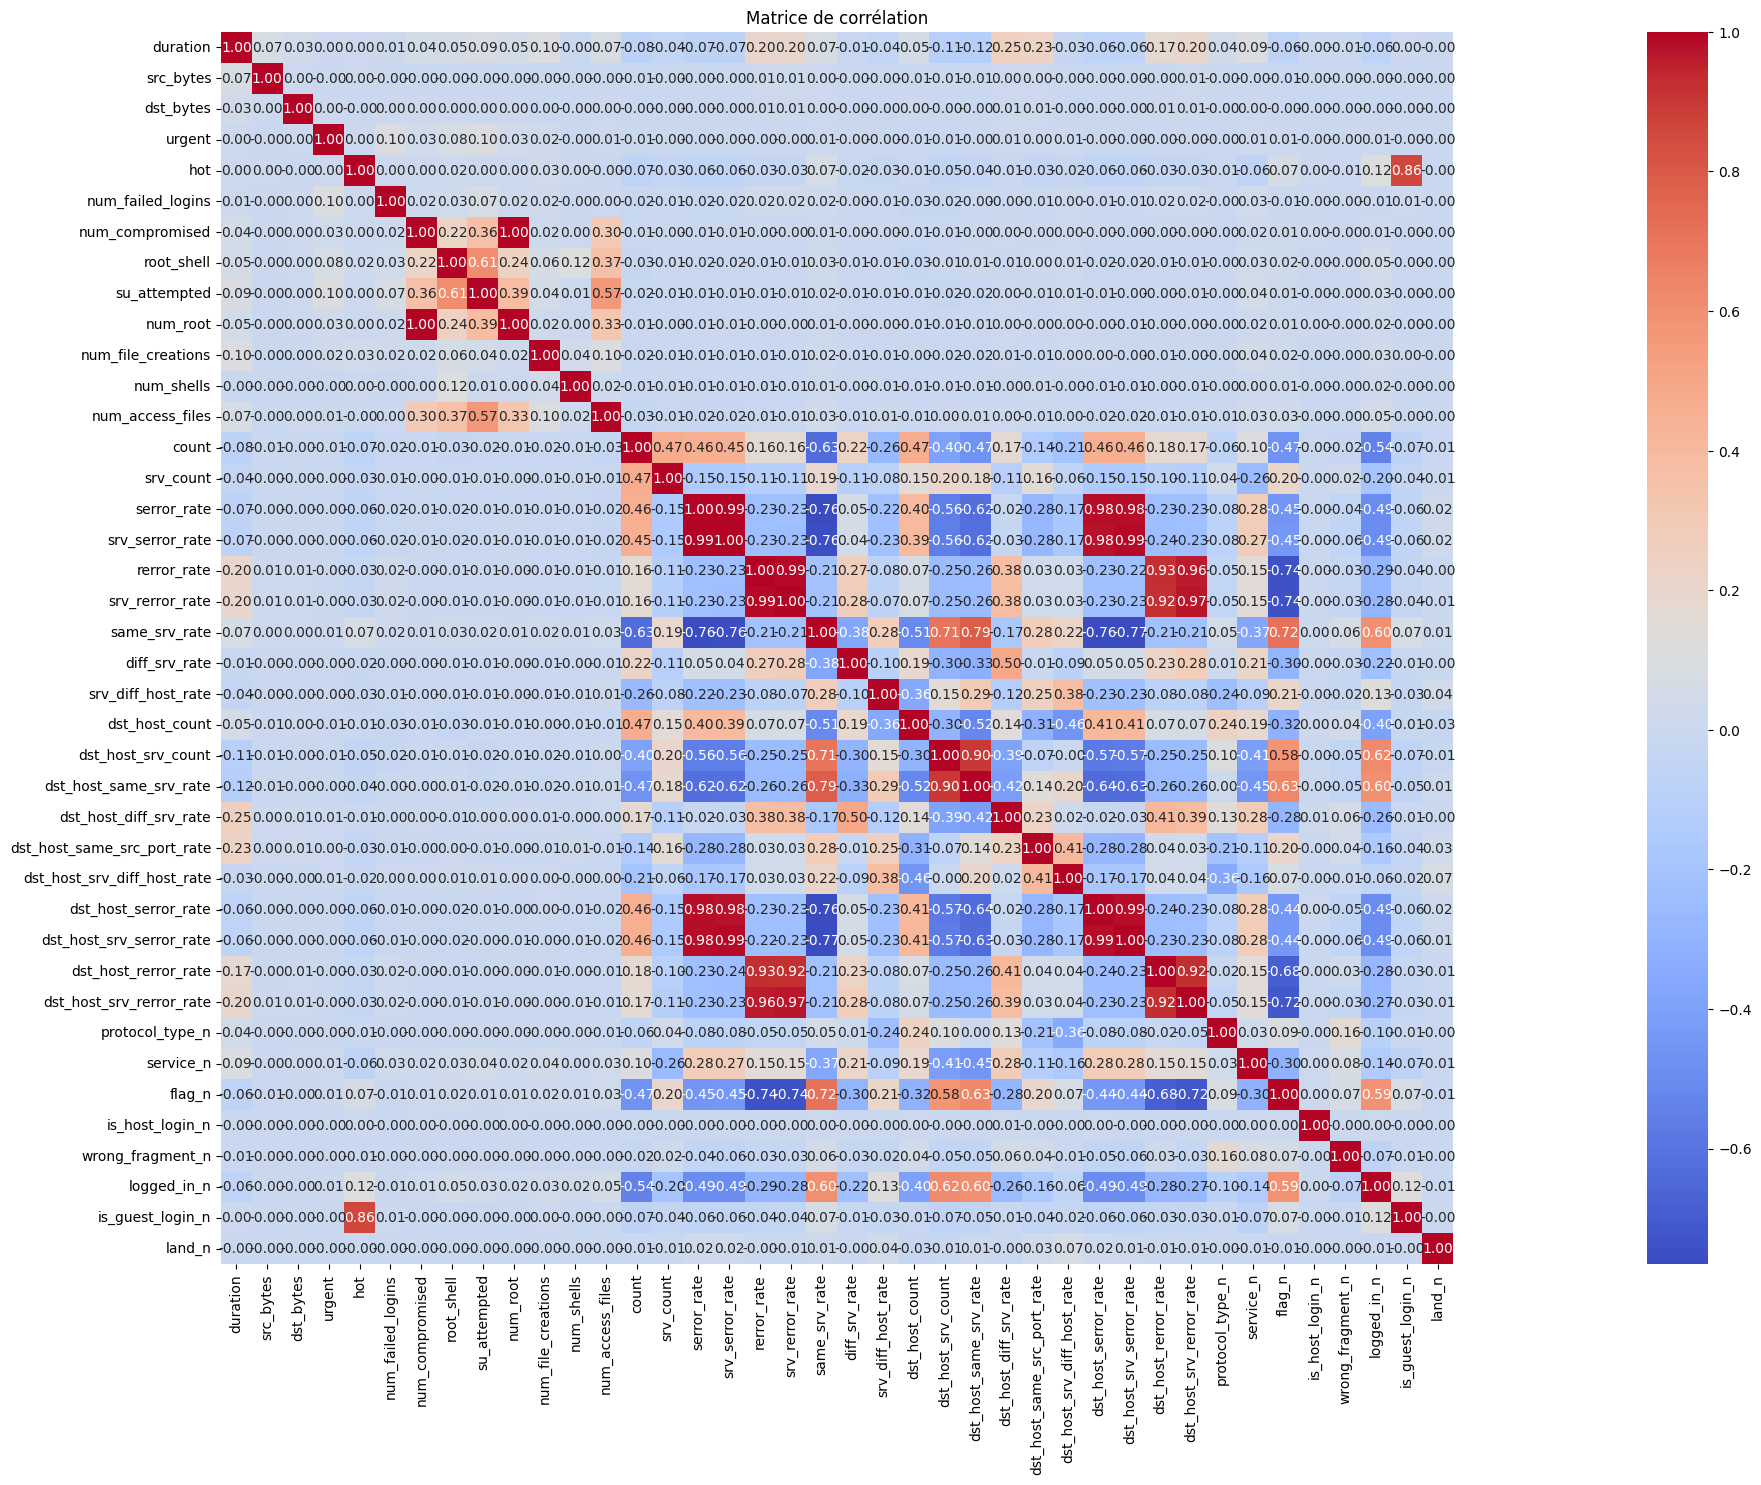

In [20]:
#Calculer la matrice de corrélation


correlation_matrix = X_trains.corr()

plt.figure(figsize=(50,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation")
plt.show()


1. **Random Forest** est une méthode d'apprentissage supervisé qui utilise un ensemble d'arbres de décision pour réaliser des prédictions plus précises et robustes, réduisant ainsi le risque de surajustement présent dans les modèles d'arbres de décision individuels.

2. Chaque arbre dans la forêt est construit à partir d'un échantillon aléatoire des données (processus appelé *bagging*), et lors de la construction de chaque arbre, un sous-ensemble aléatoire de caractéristiques est sélectionné pour scinder les nœuds.

3. La prédiction finale du modèle est obtenue par un vote majoritaire pour la classification ou une moyenne pour la régression, en utilisant les prédictions de tous les arbres de la forêt.

4. **Random Forest** offre des avantages tels que la gestion efficace des bases de données à grandes dimensions et la capacité de fournir des indices sur l'importance des différentes caractéristiques pour la prédiction.

5. Bien que très performant et polyvalent, Random Forest peut être gourmand en ressources computationnelles et en mémoire, et les modèles résultants peuvent être complexes et moins interprétables que d'autres algorithmes. **texte en gras**

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=39)

# Train the model
model.fit(X_trains, y_trains)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_tests)

# Evaluate the model # Calculer les métriques
accuracy = model.score(X_tests, y_tests)
precision = precision_score(y_tests, y_pred)
rappel = recall_score(y_tests, y_pred)
exactitude = accuracy_score(y_tests, y_pred)
score_f1 = f1_score(y_tests, y_pred)
 # Afficher les métriques
print("Precision:", precision)
print("Rappel:", rappel)
print("Exactitude:", exactitude)
print("Score F1:", score_f1)
print(f"Accuracy: {accuracy}")


Precision: 0.6727946415847228
Rappel: 0.972299454227165
Exactitude: 0.7843772178850248
Score F1: 0.7952832175194777
Accuracy: 0.7843772178850248


**Le SVM cherche à trouver un hyperplan qui sépare le mieux les différentes classes de données dans l'espace des caractéristiques. Un hyperplan est essentiellement une décision qui divise l'espace en différentes classes. L'objectif du SVM est de maximiser la marge entre cet hyperplan et les points de données les plus proches de chaque classe. Ces points de données sont appelés vecteurs de support, et la marge est la distance entre l'hyperplan et ces points. Un plus grand espace de marge est généralement synonyme de meilleure généralisation sur des données non vues.**

In [22]:
# Importation des librairies nécessaires
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supposons que X_trains, X_tests, y_trains, y_tests sont déjà définis

# Initialisation de StandardScaler
scaler = StandardScaler()
X_trains_scaled = scaler.fit_transform(X_trains)
X_tests_scaled = scaler.transform(X_tests)

# Nombre de runs pour l'entraînement
num_runs = 5
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for i in range(num_runs):
    # Initialisation du classificateur SVM avec un random_state variable
    model = SVC(kernel='rbf', random_state=i+1)  # Changement de random_state à chaque itération

    # Entraînement du modèle SVM
    model.fit(X_trains_scaled, y_trains)

    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_tests_scaled)

    # Calcul des métriques
    accuracy = accuracy_score(y_tests, y_pred)
    precision = precision_score(y_tests, y_pred)
    rappel = recall_score(y_tests, y_pred)
    f1 = f1_score(y_tests, y_pred)

    # Stockage des scores pour analyse ultérieure
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(rappel)
    f1_scores.append(f1)

    # Affichage des métriques pour chaque entraînement
    print(f"Run {i+1}:")
    print(" Precision:", precision)
    print(" Rappel:", rappel)
    print(" Exactitude:", accuracy)
    print(" Score F1:", f1)
    print("-------------------------------")

# Affichage des moyennes des scores
print("Moyenne des scores sur les runs:")
print(" Moyenne Precision:", np.mean(precision_scores))
print(" Moyenne Rappel:", np.mean(recall_scores))
print(" Moyenne Exactitude:", np.mean(accuracy_scores))
print(" Moyenne Score F1:", np.mean(f1_scores))


Run 1:
 Precision: 0.6676012897798963
 Rappel: 0.9807434867675832
 Exactitude: 0.781360894251242
 Score F1: 0.7944279934937649
-------------------------------
Run 2:
 Precision: 0.6676012897798963
 Rappel: 0.9807434867675832
 Exactitude: 0.781360894251242
 Score F1: 0.7944279934937649
-------------------------------
Run 3:
 Precision: 0.6676012897798963
 Rappel: 0.9807434867675832
 Exactitude: 0.781360894251242
 Score F1: 0.7944279934937649
-------------------------------
Run 4:
 Precision: 0.6676012897798963
 Rappel: 0.9807434867675832
 Exactitude: 0.781360894251242
 Score F1: 0.7944279934937649
-------------------------------
Run 5:
 Precision: 0.6676012897798963
 Rappel: 0.9807434867675832
 Exactitude: 0.781360894251242
 Score F1: 0.7944279934937649
-------------------------------
Moyenne des scores sur les runs:
 Moyenne Precision: 0.6676012897798963
 Moyenne Rappel: 0.9807434867675833
 Moyenne Exactitude: 0.781360894251242
 Moyenne Score F1: 0.7944279934937649


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




# Normalisation des caractéristiques d'entrée
scaler = StandardScaler()
X_train_scaledT = scaler.fit_transform(X_trains)
X_test_scaledT = scaler.transform(X_tests)

# Construction du modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaledT.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train_scaledT, y_trains, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test_scaledT, y_tests, verbose=0)

# Faire des prédictions sur l'ensemble de test
y_pred = (model.predict(X_test_scaledT) > 0.5).astype("int32")

# Calcul des autres métriques de performance
precision = precision_score(y_tests, y_pred)
recall = recall_score(y_tests, y_pred)
f1 = f1_score(y_tests, y_pred)

# Affichage des résultats
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Epoch 1/50
3150/3150 [==============================] - 9s 2ms/step - loss: 0.0459 - accuracy: 0.9846 - val_loss: 0.0259 - val_accuracy: 0.9914
Epoch 2/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.0240 - accuracy: 0.9913 - val_loss: 0.0211 - val_accuracy: 0.9933
Epoch 3/50
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0204 - accuracy: 0.9924 - val_loss: 0.0196 - val_accuracy: 0.9941
Epoch 4/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.0180 - accuracy: 0.9936 - val_loss: 0.0198 - val_accuracy: 0.9934
Epoch 5/50
3150/3150 [==============================] - 9s 3ms/step - loss: 0.0161 - accuracy: 0.9943 - val_loss: 0.0157 - val_accuracy: 0.9942
Epoch 6/50
3150/3150 [==============================] - 7s 2ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.0168 - val_accuracy: 0.9946
Epoch 7/50
3150/3150 [==============================] - 8s 3ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.0135 - val_accuracy:

In [24]:
# Importation des librairies nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import numpy as np

# Supposons que X_trains, X_tests, y_trains, y_tests sont déjà définis

# Nombre de runs pour l'entraînement
num_runs = 30
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for i in range(num_runs):
    # Initialiser le modèle avec un random_state variable pour introduire de la variabilité
    model = RandomForestClassifier(random_state=40 + i)

    # Entraîner le modèle
    model.fit(X_trains, y_trains)

    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_tests)

    # Calculer les métriques
    accuracy = accuracy_score(y_tests, y_pred)
    precision = precision_score(y_tests, y_pred)
    rappel = recall_score(y_tests, y_pred)
    f1 = f1_score(y_tests, y_pred)

    # Stocker les scores pour analyse ultérieure
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(rappel)
    f1_scores.append(f1)

    # Afficher les métriques pour chaque entraînement
    print(f"Run {i+1}:")
    print(" Precision:", precision)
    print(" Rappel:", rappel)
    print(" accuracy:", accuracy)
    print(" Score F1:", f1)
    print("-------------------------------")

# Afficher les moyennes des scores
print("Moyenne des scores sur les runs:")
print(" Moyenne Precision:", np.mean(precision_scores))
print(" Moyenne Rappel:", np.mean(recall_scores))
print(" Moyenne Exactitude:", np.mean(accuracy_scores))
print(" Moyenne Score F1:", np.mean(f1_scores))


Run 1:
 Precision: 0.6527335640138409
 Rappel: 0.9712696941612604
 accuracy: 0.7650372604684174
 Score F1: 0.7807623856628451
-------------------------------
Run 2:
 Precision: 0.6670201484623541
 Rappel: 0.9715786221810319
 accuracy: 0.778832505322924
 Score F1: 0.7909959758551307
-------------------------------
Run 3:
 Precision: 0.6735873287671232
 Rappel: 0.9721964782205746
 accuracy: 0.7850869410929737
 Score F1: 0.7958022506005816
-------------------------------
Run 4:
 Precision: 0.6731153626499143
 Rappel: 0.9709607661414891
 accuracy: 0.7843772178850248
 Score F1: 0.7950588136093427
-------------------------------
Run 5:
 Precision: 0.6596518212962316
 Rappel: 0.9715786221810319
 accuracy: 0.7718239886444287
 Score F1: 0.7857916215540935
-------------------------------
Run 6:
 Precision: 0.6646727656579874
 Rappel: 0.9726083822469365
 accuracy: 0.7768364088005678
 Score F1: 0.7896827055725096
-------------------------------
Run 7:
 Precision: 0.650110223201984
 Rappel: 0.97178